In [1]:
import numpy as np
import scipy as sp
import sympy as smp
from sympy import I
from scipy.special import voigt_profile
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

Equivalent width is: 8.939


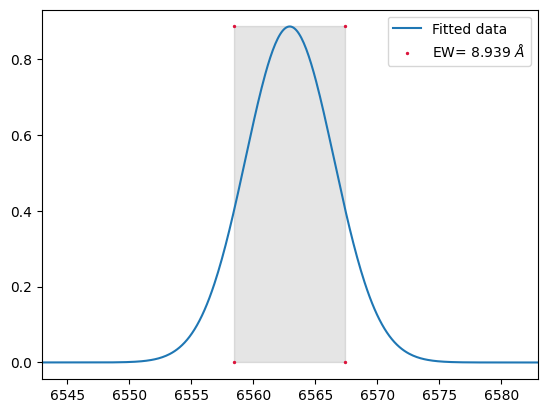

In [ ]:
##### Gaussian symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
f = amp/(sigma * smp.sqrt(2 * np.pi)) * smp.exp(-(x-mu)**2/(2 * sigma**2)) # Gaussian according to https://lmfit.github.io/lmfit-py/builtin_models.html#gaussianmodel
f

smp.integrate(f, (x, -smp.oo, smp.oo))

#############################################################################################################################
f = lambda x: a/(b * np.sqrt(2 * np.pi)) * np.exp(-(x-c)**2/(2 * b**2))
a,b,c = 7.922,3.566,6562.93 #input the values for amplitude, width, centre of peak
height = 0.398942280401433*a/b #Get the true height of the peak
FULL_integral = quad(f, 6400, 6700)[0] #this is the full value if the fitted function is integrated

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")


def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 7.922,3.566,6562.93 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    return a/(b * np.sqrt(2 * np.pi)) * np.exp(-(x-c)**2/(2 * b**2))

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()
##########################################################################################################################



Equivalent width is: 9.977


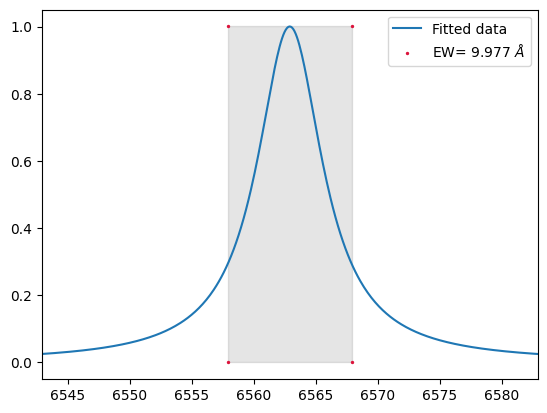

In [7]:
##### Lorentzian symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
# gam = smp.symbols('g', real=True)
f = amp/(np.pi) * (sigma/((x-mu)**2+sigma**2)) # Lorentzian according to https://lmfit.github.io/lmfit-py/builtin_models.html#lorentzianmodel
f


smp.integrate(f, (x, -smp.oo, smp.oo))

f = lambda x: a/(np.pi) * (b/((x-c)**2+b**2))
a,b,c = 10.11998,3.22,6562.88 #input the values for amplitude, width, centre of peak
height = 0.3183099*a/b #Get the true height of the peak
FULL_integral = quad(f, 6400, 6700)[0] #this is the full value if the fitted function is integrated

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")


def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 10.11998,3.22,6562.88 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    return a/(np.pi) * (b/((x-c)**2+b**2))

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()



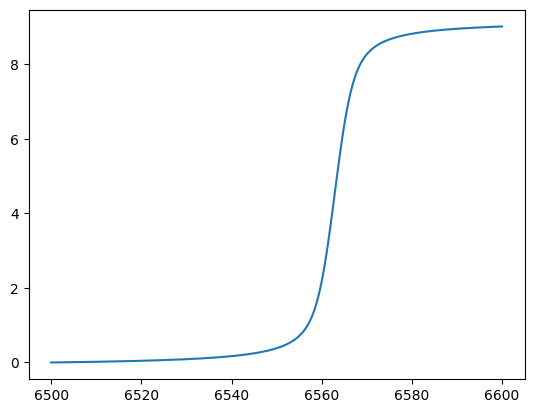

Equivalent width is: 9.575


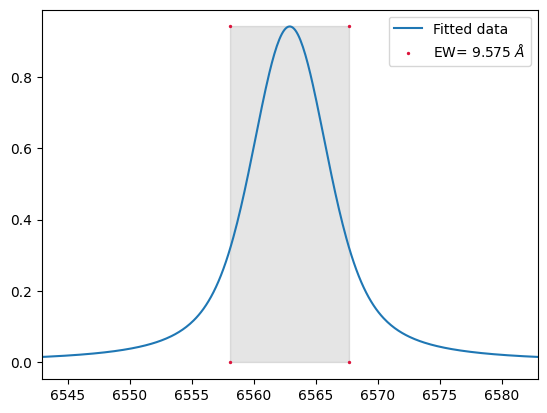

In [10]:
##### Voigt symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
gam = smp.symbols('gamma', real=True)

z = smp.symbols('z')
w = smp.symbols('w')

z=(x-mu+I*gam)/(sigma*smp.sqrt(2))
w=smp.exp(-z**2)*smp.erfc(-I*z)

f = (amp*smp.re(w))/(sigma*smp.sqrt(2*np.pi)) # Voigt according to https://lmfit.github.io/lmfit-py/builtin_models.html#voigtmodel
f


def func_voigt(x, amp, ctr, wid): #Fitting function voigt

    y = np.zeros_like(x)

    gam = wid
    y = y + voigt_profile(x - ctr, wid, gam) * amp
    return y

def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 9.27,2.056,6562.90 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    ans = func_voigt(x, a, c, b)
    return ans

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
# print(xvals,yvals)


a,b,c = 9.27,2.056,6562.90 #input the values for amplitude, width, centre of peak
f = func(xvals)
height = max(yvals) #Get the true height of the peak from LMfit params! just brute forcing it now to test this usecase
FULL_integral = cumulative_trapezoid(yvals, xvals, initial=0) #this is the full value if the fitted function is integrated
plt.plot(xvals,FULL_integral)
plt.show()
# print(FULL_integral[:-1])

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral[-1]):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")

plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()


In [13]:
smp.integrate(f, x)

0.199471140200716*sqrt(2)*sqrt(pi)*A*erf(sqrt(2)*(-mu + x)/(2*sigma))

In [14]:
smp.integrate(f, x).simplify()

-0.199471140200716*sqrt(2)*sqrt(pi)*A*erf(sqrt(2)*(mu - x)/(2*sigma))